# 1.Using a Confidence Interval to Make A Decision

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)
df = pd.read_csv('coffee_dataset.csv')

#### what if we want to ask the question, if average height of coffee drinkers >70 inches?

We can set up the null and alternative hypothesis following way. Here we we have average height of all coffee drinkers <=70 in the null hypothesis and the average height is >70 in the alternative hypothesis, notice we are allways testing parameter so i am using $\mu$ to represent the mean of all cofee drinkers.

$$H_0:\mu<=70$$
$$H_1:\mu>70$$


Based on what we did with confidence intervals, you can imagine a way to prove if this null hypothesis is possible. Its just to bootstrap a sample set of data and compute the sample mean again and agian. And build the sampling distribution and corresponding confidence interval to determine what are the possible values for the population mean with some level of cofidence.Lets do this

In [103]:
#lets get a smple from our datset
sample_df = df.sample(150)

In [104]:
#lets bootstrap the sample
bootsample = sample_df.sample(150, replace = True)

In [105]:
#lets bootstrap 10000  times and compute mean for the each bootstrap sample and store it in a vector called mean
means = [] #empty vector
for _ in range(10000):
    bootsample = sample_df.sample(150, replace = True) #bootstrap sample
    means.append(bootsample.height.mean()) #find the mean of each bootstrap sample and append into means

In [106]:
#create the lover and upper bound confidence interval
low, upper = np.percentile(means, 2.5), np.percentile(means, 97.5)

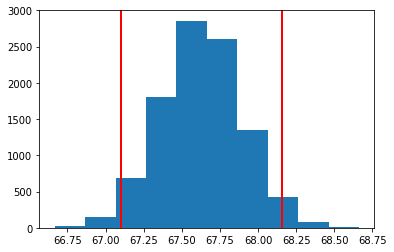

In [107]:
#plot a histogram
plt.hist(means);
plt.axvline(x=low, color='r', linewidth=2);
plt.axvline(x=upper, color='r', linewidth=2);

Using our confidence interval, we can simply look at if the interval falls in the null hypothesis space or in the alternative hypothesis space to choose which hypothesis you believe to be true.

#### In the above case, our interval was entirely below 70, which would suggest the null (the population mean is less than 70) is actually true.

# 2.Simulating from The Null Hypothesis

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)
df = pd.read_csv('coffee_dataset.csv')

#### Consider the same example as above wher we asked weather mean height of all coffee drinkers > 70, 
We could again setup Null and alternative hypothesis like below

$$H_0:\mu<=70$$
$$H_1:\mu>70$$


#### A second approach which is commonly done making decisions in hypothesis testing is the following

We assume that the null is true and we know what the sampling distribution would look like if we could similuate the closest value under the null to the alternative

_In hypothesis testing, we first simulate from the closest value to the alternative that is still in the null space_

That is $\mu$ value to the 70, that is the closest value under null hypothesis to the alternative hypothesis, we could use the standard deviation of the sampling distribution to determine what the sampling distribution would look like if it came from the null hypothesis. We will simulate fromt the normal distribution in this case

In [109]:
#lets pull out the same above code and calculate the standard deviation of our sampling distribution
sample_df = df.sample(150)
means = [] 
for _ in range(10000):
    bootsample = sample_df.sample(150, replace = True) 
    means.append(bootsample.height.mean())

In [110]:
np.std(means)

0.2658039514418037

The sampling distribution for the mean is also equla to: $$\frac{\sigma}{\sqrt{N}}$$

So the standard deviation of sampling distributin is 0.265

#### we know if it is came from the null hypothesis value 70, what it would look like?

By central limit theorem it would follow normal distribution (_With a sample size of 150, the mean should follow a normal distribution by the central limit theorem_). Now from the [numpy documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) on normal distribution , we see we can simulate draws from the normal distribution using the hypothesis mean at 70 in the standard deviation of our sampling distribution following way.

In [111]:
#in this equation, the parameter loc which is the mean of the distribution which is 70, 
#and parameter scale is the standard deviation of the sampling distribution and we can simulate for a 10000 values now
null_vals = np.random.normal(70, np.std(means),10000)

Each of the simulated draws above represents the possible means from null hypothesis, we can now ask the question where the sample mean falls in this distribution

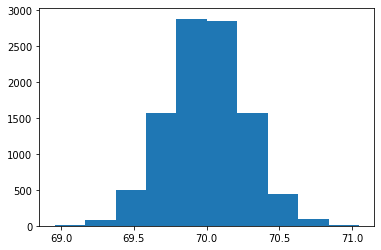

In [112]:
plt.hist(null_vals);

In [113]:
sample_df.height.mean()

67.63297688228066

If we go back and have a look at where our sample mean was, which is the value 67.63, It falls far below in the above ploted histogram of Null hypothesis distribution, if our sample mean falls closer to the center value (which is 70) of the above plotted histogram, it would be a value that we would expect from the null hypothesis. And there for we think that the null is more likely to be true. In this case where our sample mean(67.63) so for below from the tail of the above ploted distribution.Its fair enough that the sample mean is not came from the hypothesis value.

_<b>Comparing the actual sample mean to this distribution tells us the likelihood of our statistics coming from the Null<b>_

### Some Clarity On The Ending
In the end, it is suggested that we do not believe that our null hypothesis value of 70 would be supported, which is true. However, since our null is that the population mean is less than or equal to 70, we do have evidence to support this claim with our sample mean of approximately 67. This would suggest not rejecting our one-sided null alternative.

If we had a null where we asked if the population mean was equal to 70, then we would be able to reject this null in favor of an alternative that suggested the population mean was actually different from 70.